## Práctica 1 - Optimización No Lineal

## Pablo Clemente Moreno <br> No. Cuenta: 418125805

1. Implementación de métodos: Búsqueda exhaustiva, División de intervalos por la mitad,Fibonacci, Sección dorada.
2. Usando los métodos anteriores minimice la siguiente función: $f(x)= 0.65 - [\frac{0.75}{1+x}] - 0.65xtan^{-1}(\frac{1}{x})$
3. En su reporte debe incluir la pantalla de la ejecución de cada uno de los métodos.

In [1]:
import math

In [2]:
num_eval=0
def f(x):
    global num_eval
    num_eval+= 1
    try:
        return (0.65 - (0.75/1+x**2)) - ((0.65 * x)*math.atan(1/x))
    except ZeroDivisionError:
        return 0

In [3]:
def busqueda_exhaustiva(a,b,n):
    x1 = a
    dx = (b - a)/n
    x2 = x1 + dx
    x3 = x2 + dx

    f1 = f(x1)
    f2 = f(x2)
    f3 = f(x3)
    while x3 <= b:
        if f1 >= f2 <=f3:
            x1 = x1
            x2 = x3
            break
        else:
            x1 = x2
            x2 = x3
            x3 = x2+dx
        f1 = f2
        f2 = f3
        f3 = f(x3)+dx
    print("(%.3f,%.3f)"%(x1,x3))
    return print(num_eval)

In [4]:
a, b, n = 0, 3, 6000
busqueda_exhaustiva(a,b,n)

(2.999,3.000)
6001


In [5]:
def div_int_mitad(a,b,eps):
    e = eps
    x1 = a
    x2 = b 
    xm = (b + a)/2
    L = abs(b-a)
    fxm = f(xm)
    while L > e:
        x1 = a+(L/4)
        x2 = b - (L/4)
        f1 = f(x1)
        if f1 < fxm:
            b = xm
            xm = x1
            fxm = f1
        else:
            f2 = f(x2) 
            if f2 < fxm:
                a = xm
                xm = x2
                fxm = f2
            else:
                a = x1
                b = x2
        L = b-a
    print("(%.3f,%.3f)"%(a,b))
    print(num_eval)
    return

In [6]:
a,b,eps = 0,3,0.001
div_int_mitad(a,b,eps)

(2.999,3.000)
6026


In [7]:
def fibonacci(n):
    # first two terms
    n1, n2 = 1, 1
    count = 0
    # check if the number of terms is valid
    if n <= 0:
        return 1
    elif n == 1:
        return n1
    else:
        while count < n:
            nth = n1 + n2
            # update values
            n1 = n2
            n2 = nth
            count += 1
        return n1

In [8]:
def Fibonacci(a,b,n):
    k = 2
    fn = fibonacci(n)
    fn_k= fibonacci(n-k)
    L = abs(b-a)
    Lk = (fn_k/fn)*L
    aux = 3
    while k <= n:
        if  aux == 1:
            x1 = x2
            f1 = f2
            x2 = b - Lk
            f2 = f(x2)
        elif  aux == 2:
            x2 = x1
            f2 = f1
            x1 = a + Lk
            f1 = f(x1)
        elif aux == 3:
            Lk = (fn_k/fn)*L
            x1 = a + Lk
            x2 = b - Lk 
            f1 = f(x1)
            f2 = f(x2)
        if f1 > f2:
            a = x1
            aux = 1 
        else:
            b = x2
            aux = 2 
        k += 1
        fn_k = fibonacci(n-k)
        Lk = (fn_k/fn)*L   
    print("(%.3f,%.3f)"%(a,b))
    print(num_eval)
    return

In [9]:
Fn = b-a/0.001 #=3000
n= fibonacci(17) #lo mas cercano a 3000 es 2584 el cual se obtiene en la posicion de la sucesión de fibonacci 17
Fibonacci(a,b,17)

(2.998,2.999)
6043


In [10]:
num_eval = 0 
def ff(w,a,b):
    global num_eval
    num_eval += 1 
    x = (b-a)*w + a 
    return 0.65 - (0.75/1+x**2) - 0.65*x*math.atan(1/x)
def seccion_dorada(a,b,eps):
    e = eps/(b-a)
    aw = 0
    bw = 1
    lw = 1
    aux = 3

    while lw > e:
        if aux == 1:
            w2 = w1
            fw2 = fw1
            w1 = aw +(0.618*lw)
            fw1 = ff(w1, a,b)
        elif aux == 2:
            w1 = w2
            fw1 = fw2
            w2 = bw -(0.618*lw)
            fw2 = ff(w2,a,b)
        elif aux == 3:
            w1 = aw +(0.618*lw)
            w2 = bw -(0.618*lw)
            fw1 = ff(w1, a,b)
            fw2 = ff(w2,a,b)
        if  fw1 < fw2:
            aw = w2 
            aux = 1
        else:
            bw = w1
            aux = 2
        lw = bw - aw 
    print("(%.3f,%.3f)"%((b-a)*aw + a,(b-a)*bw + a))
    print(num_eval)

In [11]:
seccion_dorada(a,b,eps)

(2.999,3.000)
18


Método | Intervalo | Evaluaciones
-- | -- | --
Búsqueda exhaustiva | (2.999,3.000) | 6001
División de intervalos por la mitad |(2.999,3.000)| 25
Fibonacci| (2.998,2.999)| 17
Sección dorada |(2.999,3.000)| 18

4. Valide sus resultados (número de evaluaciones de f) haciendo el cálculo teórico. Muestre todo el procedimiento.

### Búsqueda exhaustiva:

$eval\epsilon = \frac{2L_{0}}{\epsilon } = \frac{2(3-0)}{0.001}= \frac{6}{0.001}=6000$

### División de intervalos por la mitad:

$eval\epsilon =2\cdot \frac{log(\frac{\epsilon }{L_{0}})}{log(\frac{1}{2})}= 2\cdot \frac{log(\frac{0.001 }{3})}{log(\frac{1}{2})}= 2\cdot 11.550= 23.10$

### Fibonacci:

$F_{n}= \frac{L_{0}}{\epsilon } = \frac{3}{0.001}=3000$

Lo más cercano a 3000 es 2584 el cual se obtiene en la posición __17__ de la sucesión de fibonacci y como este método solo se requiere una evaluación de la función objetivo a cada iteración el numero de evaluciones es __17__.

### Sección dorada:

$eval\epsilon =\frac{log(\frac{\epsilon }{L_{0}})}{log(0.618)}+1= \frac{log(\frac{0.001 }{3})}{log(0.618)}+1= 16.63+1= 17.63 \approx 18$

5. Grafique f(x) en el intervalo [0, 3].

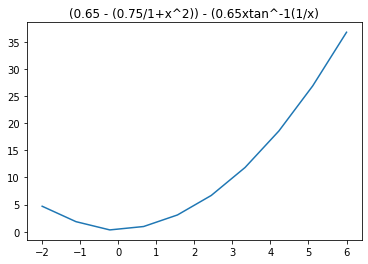

In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2.0, 6.0, num=10)
plt.plot(x, [abs(f(i)) for i in x])
plt.title("(0.65 - (0.75/1+x^2)) - (0.65xtan^-1(1/x)")
plt.show()

6. Indique cuál método es el más eficiente y explique por qué.

En este caso el método con menor evaluaciones fue Fibonacci aunque nos dio un intervalo recorrido por 0.001 hacia la izquierda que es diferente al de los otros 3 métodos los cuales dieron el mismo intervalo, asi que de los 3 con el mismo intervalo el que hizo menos evaluaciones de la funcion objetivo fue __Sección dorada__ por lo tanto creo que es el más eficiente para encontrar el optimo real. En general el que siempre cumple con el menor número de evaluaciones sin importar de que función se trate es Sección dorada.